## 1. Credit card applications
<p>Commercial banks receive <em>a lot</em> of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.</p>
<p><img src="https://assets.datacamp.com/production/project_558/img/credit_card.jpg" alt="Credit card being held in hand"></p>
<p>We'll use the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository. The structure of this notebook is as follows:</p>
<ul>
<li>First, we will start off by loading and viewing the dataset.</li>
<li>We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.</li>
<li>We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.</li>
<li>After our data is in good shape, we will do some exploratory data analysis to build our intuitions.</li>
<li>Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.</li>
</ul>
<p>First, loading and viewing the dataset. We find that since this data is confidential, the contributor of the dataset has anonymized the feature names.</p>


In [195]:
train_url = 'https://raw.githubusercontent.com/ImaadUllah/Predicting-Credit-Card-Approval/master/train.csv'
train_data = pd.read_csv(train_url)

train_data.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,2,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,3,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,4,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,5,?,26.5,2.710,y,p,?,?,0.085,f,f,0,f,s,80,0,-


In [196]:
test_url = 'https://raw.githubusercontent.com/ImaadUllah/Predicting-Credit-Card-Approval/master/test.csv'
test_data = pd.read_csv(test_url)

test_data.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,b,31.83,0.04,y,p,m,v,0.040,f,f,0,f,g,0,0
1,2,a,21.75,11.75,u,g,c,v,0.250,f,f,0,t,g,180,0
2,3,a,17.92,0.54,u,g,c,v,1.750,f,t,1,t,g,80,5
3,4,b,30.33,0.50,u,g,d,h,0.085,f,f,0,t,s,252,0
4,5,b,51.83,2.04,y,p,ff,ff,1.500,f,f,0,f,g,120,1


In [197]:
train_data = train_data.drop('Key', axis=1)
test_data = test_data.drop('Key', axis=1)

In [198]:
train_data.shape

(590, 16)

In [199]:
test_data.shape

(100, 15)

In [200]:
train_data.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,?,26.5,2.710,y,p,?,?,0.085,f,f,0,f,s,80,0,-


In [201]:
test_data.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,b,31.83,0.04,y,p,m,v,0.040,f,f,0,f,g,0,0
1,a,21.75,11.75,u,g,c,v,0.250,f,f,0,t,g,180,0
2,a,17.92,0.54,u,g,c,v,1.750,f,t,1,t,g,80,5
3,b,30.33,0.50,u,g,d,h,0.085,f,f,0,t,s,252,0
4,b,51.83,2.04,y,p,ff,ff,1.500,f,f,0,f,g,120,1


## 2. Inspecting the applications
<p>The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives us a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.   </p>
<p>As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.</p>


In [202]:
  # Printing summary statistics of training data

train_data.describe()

,Debt,YearsEmployed,CreditScore,Income
count,590.000000,590.000000,590.000000,590.000000
mean,4.609390,2.088534,2.045763,918.706780
std,4.849569,3.198681,3.702375,5025.415369
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000
50%,2.710000,1.000000,0.000000,4.000000
75%,7.000000,2.500000,2.000000,363.000000
max,26.335000,20.000000,20.000000,100000.000000


In [203]:
# Printing information of training data

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            590 non-null    object 
 1   Age             590 non-null    object 
 2   Debt            590 non-null    float64
 3   Married         590 non-null    object 
 4   BankCustomer    590 non-null    object 
 5   EducationLevel  590 non-null    object 
 6   Ethnicity       590 non-null    object 
 7   YearsEmployed   590 non-null    float64
 8   PriorDefault    590 non-null    object 
 9   Employed        590 non-null    object 
 10  CreditScore     590 non-null    int64  
 11  DriversLicense  590 non-null    object 
 12  Citizen         590 non-null    object 
 13  ZipCode         590 non-null    object 
 14  Income          590 non-null    int64  
 15  Approved        590 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 73.9+ KB


In [204]:
# Printing last 10 rows of training data for inspection

train_data.tail(10)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
580,b,38.67,0.210,u,g,k,v,0.085,t,f,0,t,g,280,0,+
581,b,25.75,0.750,u,g,c,bb,0.250,t,f,0,f,g,349,23,+
582,a,46.08,3.000,u,g,c,v,2.375,t,t,8,t,g,396,4159,+
583,a,21.5,6.000,u,g,aa,v,2.500,t,t,3,f,g,80,918,+
584,?,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,240,768,+
585,b,20.5,2.415,u,g,c,v,2.000,t,t,11,t,g,200,3000,+
586,a,29.5,0.460,u,g,k,v,0.540,t,t,4,f,g,380,500,+
587,b,16.17,0.040,u,g,c,v,0.040,f,f,0,f,g,0,0,+
588,b,22.67,0.165,u,g,c,j,2.250,f,f,0,t,s,0,0,+
589,a,25.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+


In [205]:
# Printing summary statistics of testing data

test_data.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,33.359400,5.639800,3.019150,4.490000,174.170000,1599.590000
std,11.521954,5.624441,4.039917,8.824318,159.721225,6185.926674
min,15.830000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.397500,1.000000,0.500000,0.000000,0.000000,0.000000
50%,30.705000,4.125000,1.667500,1.000000,142.500000,26.000000
75%,41.252500,9.508750,4.376250,6.000000,260.000000,509.250000
max,58.670000,28.000000,28.500000,67.000000,711.000000,50000.000000


In [206]:
# Printing information of testing data

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            100 non-null    object 
 1   Age             100 non-null    float64
 2   Debt            100 non-null    float64
 3   Married         100 non-null    object 
 4   BankCustomer    100 non-null    object 
 5   EducationLevel  100 non-null    object 
 6   Ethnicity       100 non-null    object 
 7   YearsEmployed   100 non-null    float64
 8   PriorDefault    100 non-null    object 
 9   Employed        100 non-null    object 
 10  CreditScore     100 non-null    int64  
 11  DriversLicense  100 non-null    object 
 12  Citizen         100 non-null    object 
 13  ZipCode         100 non-null    int64  
 14  Income          100 non-null    int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 11.8+ KB


In [207]:
# Printing last 10 rows of testing data for inspection

test_data.tail(10)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
90,b,34.17,1.540,u,g,cc,v,1.540,t,t,1,t,g,520,50000
91,a,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0,456
92,b,25.50,0.375,u,g,m,v,0.250,t,t,3,f,g,260,15108
93,b,19.42,6.500,u,g,w,h,1.460,t,t,7,f,g,80,2954
94,b,35.17,25.125,u,g,x,h,1.625,t,t,1,t,g,515,500
95,b,52.50,6.500,u,g,k,v,6.290,t,t,15,f,g,0,11202
96,b,57.83,7.040,u,g,m,v,14.000,t,t,6,t,g,360,1332
97,a,20.75,10.335,u,g,cc,h,0.335,t,t,1,t,g,80,50
98,b,39.92,6.210,u,g,q,v,0.040,t,t,1,f,g,200,300
99,b,25.67,12.500,u,g,cc,v,1.210,t,t,67,t,g,140,258


## 3. Handling the missing values (part i)
<p>We've uncovered some issues that will affect the performance of our machine learning model(s) if they go unchanged:</p>
<ul>
<li>Our dataset contains both numeric and non-numeric data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.</li>
<li>The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like <code>mean</code>, <code>max</code>, and <code>min</code>) about the features that have numerical values. </li>
<li>Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output.</li>
</ul>
<p>Now, let's temporarily replace these missing value question marks with NaN.</p>

In [208]:
# Import numpy
import numpy as np

# Inspect missing values in the dataset
train_data.head(20)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,?,26.5,2.710,y,p,?,?,0.085,f,f,0,f,s,80,0,-
5,?,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,263,0,-
6,?,42.25,1.750,y,p,?,?,0.000,f,f,0,t,g,150,1,-
7,?,33.17,2.250,y,p,cc,v,3.500,f,f,0,t,g,200,141,-
8,a,38.58,5.000,u,g,cc,v,13.500,t,f,0,t,g,980,0,-
9,a,19.17,0.585,y,p,aa,v,0.585,t,f,0,t,g,160,0,-


In [209]:
# Inspect missing values in the dataset

test_data.tail(20)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
80,b,23.33,11.625,y,p,w,v,0.835,t,f,0,t,g,160,300
81,b,23.17,0.000,u,g,cc,v,0.085,t,f,0,f,g,0,0
82,b,44.33,0.500,u,g,i,h,5.000,t,f,0,t,g,320,0
83,b,35.17,4.500,u,g,x,h,5.750,f,f,0,t,s,711,0
84,b,43.25,3.000,u,g,q,h,6.000,t,t,11,f,g,80,0
85,b,56.75,12.250,u,g,m,v,1.250,t,t,4,t,g,200,0
86,b,31.67,16.165,u,g,d,v,3.000,t,t,9,f,g,250,730
87,a,23.42,0.790,y,p,q,v,1.500,t,t,2,t,g,80,400
88,a,20.42,0.835,u,g,q,v,1.585,t,t,1,f,g,0,0
89,b,26.67,4.250,u,g,cc,v,4.290,t,t,1,t,g,120,0


In [210]:
# Replace the '?'s with NaN
train_data = train_data.replace('?', np.nan)

# Inspect the missing values again
train_data.tail(20)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
570,a,28.08,15.000,y,p,e,z,0.000,t,f,0,f,g,0,13212,+
571,b,73.42,17.750,u,g,ff,ff,0.000,t,f,0,t,g,0,0,+
572,b,64.08,20.000,u,g,x,h,17.500,t,t,9,t,g,0,1000,+
573,b,51.58,15.000,u,g,c,v,8.500,t,t,9,f,g,0,0,+
574,b,26.67,1.750,y,p,c,v,1.000,t,t,5,t,g,160,5777,+
575,b,25.33,0.580,u,g,c,v,0.290,t,t,7,t,g,96,5124,+
576,b,30.17,6.500,u,g,cc,v,3.125,t,t,8,f,g,330,1200,+
577,b,27,0.750,u,g,c,h,4.250,t,t,3,t,g,312,150,+
578,b,23.17,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,+
579,b,34.17,5.250,u,g,w,v,0.085,f,f,0,t,g,290,6,+


In [211]:
# Replace the '?'s with NaN
test_data = test_data.replace('?', np.nan)

# Inspect the missing values again
test_data.tail(60)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
40,b,36.67,4.415,y,p,k,v,0.250,t,t,10,t,g,320,0
41,b,28.25,0.875,u,g,m,v,0.960,t,t,3,t,g,396,0
42,a,23.25,5.875,u,g,q,v,3.170,t,t,10,f,g,120,245
43,b,21.83,0.250,u,g,d,h,0.665,t,f,0,t,g,0,0
44,a,19.17,8.585,u,g,cc,h,0.750,t,t,7,f,g,96,0
45,b,25.00,11.250,u,g,c,v,2.500,t,t,17,f,g,200,1208
46,b,23.25,1.000,u,g,c,v,0.835,t,f,0,f,s,300,0
47,a,47.75,8.000,u,g,c,v,7.875,t,t,6,t,g,0,1260
48,a,27.42,14.500,u,g,x,h,3.085,t,t,1,f,g,120,11
49,a,41.17,6.500,u,g,q,v,0.500,t,t,3,t,g,145,0


## 4. Handling the missing values (part ii)
<p>We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.</p>
<p>An important question that gets raised here is <em>why are we giving so much importance to missing values</em>? Can't they be just ignored? Ignoring missing values can affect the performance of a machine learning model heavily. While ignoring the missing values our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models which cannot handle missing values implicitly such as LDA. </p>
<p>So, to avoid this problem, we are going to impute the missing values with a strategy called mean imputation.</p>

In [212]:
# Impute the missing values with mean imputation
train_data.fillna(train_data.mean(), inplace=True)

# Count the number of NaNs in the dataset and print the counts to verify
train_data.isnull().sum()

Male              11
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [213]:
# Impute the missing values with mean imputation
test_data.fillna(test_data.mean(), inplace=True)

# Count the number of NaNs in the dataset and print the counts to verify
test_data.isnull().sum()

Male              1
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
dtype: int64

## 5. Handling the missing values (part iii)
<p>We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns 0, 1, 3, 4, 5, 6 and 13. All of these columns contain non-numeric data and this why the mean imputation strategy would not work here. This needs a different treatment. </p>
<p>We are going to impute these missing values with the most frequent values as present in the respective columns. This is <a href="https://www.datacamp.com/community/tutorials/categorical-data">good practice</a> when it comes to imputing missing values for categorical data in general.</p>


In [214]:
# Iterate over each column of train_data
for col in train_data.columns:
    # Check if the column is of object type
    if train_data[col].dtypes == 'object':
        # Impute with the most frequent value
        train_data = train_data.fillna(train_data[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(train_data.isnull().sum())

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [215]:
# Iterate over each column of test_data
for col in test_data.columns:
    # Check if the column is of object type
    if test_data[col].dtypes == 'object':
        # Impute with the most frequent value
        test_data = test_data.fillna(test_data[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(test_data.isnull().sum())

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
dtype: int64


## 6. Preprocessing the data (part i)
<p>The missing values are now successfully handled.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Split the data into train and test sets. </li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using a technique called <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">label encoding</a>.</p>

In [216]:
train_data.dtypes

Male               object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
Approved           object
dtype: object

In [217]:
train_data.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,b,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,b,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,b,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,b,26.5,2.710,y,p,b,b,0.085,f,f,0,f,s,80,0,-


In [218]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

In [219]:
cat_features_train = [x for x in train_data.columns if train_data[x].dtype=="object"]

print(cat_features_train)

# Iterate over all the values of each column and extract their dtypes

for col in cat_features:
  train_data[col] = le.fit_transform(train_data[col])

['Male', 'Age', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode', 'Approved']


In [220]:
train_data.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,231,3.500,2,1,7,1,0.500,0,0,0,0,2,6,0,1
1,1,163,1.500,2,1,2,8,0.250,0,0,0,1,0,95,122,1
2,1,124,0.585,2,1,0,8,0.040,0,0,0,0,0,63,1004,1
3,1,139,0.665,2,1,13,8,0.250,0,0,0,1,0,75,0,1
4,1,107,2.710,3,3,1,0,0.085,0,0,0,0,2,144,0,1


In [221]:
cat_features_test = [x for x in test_data.columns if test_data[x].dtype=="object"]

print(cat_features_test)

# Iterate over all the values of each column and extract their dtypes

for col in cat_features_test:
  test_data[col] = le.fit_transform(test_data[col])

['Male', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen']


In [222]:
test_data.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,31.83,0.04,1,1,8,3,0.040,0,0,0,0,0,0,0
1,0,21.75,11.75,0,0,1,3,0.250,0,0,0,1,0,180,0
2,0,17.92,0.54,0,0,1,3,1.750,0,1,1,1,0,80,5
3,1,30.33,0.50,0,0,3,2,0.085,0,0,0,1,1,252,0
4,1,51.83,2.04,1,1,5,1,1.500,0,0,0,0,0,120,1


In [223]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
# train_data = train_data.drop([11, 13], axis=1)
# train_data = train_data.values

# Segregate features and labels into separate variables
train_label = train_data.Approved
train_features = train_data.drop('Approved', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state=42, stratify=y)

In [224]:
print('Shape of X_train: ', X_train.shape)
print('\nShape of y_train: ', y_train.shape)
print('\nShape of X_test: ', X_test.shape)
print('\nShape of y_test: ', y_test.shape)

Shape of X_train:  (442, 15)

Shape of y_train:  (442,)

Shape of X_test:  (148, 15)

Shape of y_test:  (148,)


## 8. Preprocessing the data (part ii)
<p>The data is now split into two separate sets - train and test sets respectively. We are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data. </p>
<p>Now, let's try to understand what these scaled values mean in the real world. Let's use <code>CreditScore</code> as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we're rescaling all the values to the range of 0-1.</p>

In [226]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

## 9. Fitting a logistic regression model to the train set
<p>Essentially, predicting if a credit card application will be approved or not is a <a href="https://en.wikipedia.org/wiki/Statistical_classification">classification</a> task. <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names">According to UCI</a>, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved. </p>
<p>This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.</p>
<p>Which model should we pick? A question to ask is: <em>are the features that affect the credit card approval decision process correlated with each other?</em> Although we can measure correlation, that is outside the scope of this notebook, so we'll rely on our intuition that they indeed are correlated for now. Because of this correlation, we'll take advantage of the fact that generalized linear models perform well in these cases. Let's start our machine learning modeling with a Logistic Regression model (a generalized linear model).</p>

In [227]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()


# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 10. Making predictions and evaluating performance
<p>But how well does our model perform? </p>
<p>We will now evaluate our model on the test set with respect to <a href="https://developers.google.com/machine-learning/crash-course/classification/accuracy">classification accuracy</a>. But we will also take a look the model's <a href="http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/">confusion matrix</a>. In the case of predicting credit card applications, it is equally important to see if our machine learning model is able to predict the approval status of the applications as denied that originally got denied. If our model is not performing well in this aspect, then it might end up approving the application that should have been approved. The confusion matrix helps us to view our model's performance from these aspects.  </p>

In [228]:
# Import confusion_matrix
from sklearn import metrics

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test )

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", metrics.accuracy_score(y_test, y_pred))

# Print the confusion matrix of the logreg model
print('\n', metrics.confusion_matrix(y_test, y_pred))


Accuracy of logistic regression classifier:  0.8581081081081081

 [[75 15]
 [ 6 52]]


## 11. Grid searching and making the model perform better
<p>Our model was pretty good! It was able to yield an accuracy score of almost 84%.</p>
<p>For the confusion matrix, the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances (denied applications) predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the true positives meaning the number of positive instances (approved applications) predicted by the model correctly.</p>
<p>Let's see if we can do better. We can perform a <a href="https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/">grid search</a> of the model parameters to improve the model's ability to predict credit card approvals.</p>
<p><a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">scikit-learn's implementation of logistic regression</a> consists of different hyperparameters but we will grid search over the following two:</p>
<ul>
<li>tol</li>
<li>max_iter</li>
</ul>

In [229]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV


# Define the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = {'tol':tol, 'max_iter':max_iter}

## 12. Finding the best performing model
<p>We have defined the grid of hyperparameter values and converted them into a single dictionary format which <code>GridSearchCV()</code> expects as one of its parameters. Now, we will begin the grid search to see which values perform best.</p>
<p>We will instantiate <code>GridSearchCV()</code> with our earlier <code>logreg</code> model with all the data we have. Instead of passing train and test sets separately, we will supply <code>X</code> (scaled version) and <code>y</code>. We will also instruct <code>GridSearchCV()</code> to perform a <a href="https://www.dataschool.io/machine-learning-with-scikit-learn/">cross-validation</a> of five folds.</p>
<p>We'll end the notebook by storing the best-achieved score and the respective best parameters.</p>
<p>While building this credit card predictor, we tackled some of the most widely-known preprocessing steps such as <strong>scaling</strong>, <strong>label encoding</strong>, and <strong>missing value imputation</strong>. We finished with some <strong>machine learning</strong> to predict if a person's application for a credit card would get approved or not given some information about that person.</p>

In [230]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = (grid_model_result.best_score_, grid_model_result.best_params_)
print("Best score is: ", best_score,  " using the parameters: ", best_params)

Best score is:  0.8305084745762713  using the parameters:  {'max_iter': 100, 'tol': 0.01}


In [231]:
train_data.columns

Index(['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [232]:
train_data = train_data.drop(['DriversLicense', 'ZipCode'], axis=1)

test_data = test_data.drop(['DriversLicense', 'ZipCode'], axis=1)

In [233]:
train_label = train_data.Approved
train_features = train_data.drop('Approved', axis=1)

In [234]:
print('Shape of train_label: ', train_label.shape)
print('\nShape of train_features: ', train_features.shape)

Shape of train_label:  (590,)

Shape of train_features:  (590, 13)


In [235]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_train_features = scaler.fit_transform(train_features)
rescaled_test_features = scaler.transform(test_data)

In [236]:
rescaled_train_features

array([[1.        , 0.71962617, 0.13290298, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.50778816, 0.05695842, ..., 0.        , 0.        ,
        0.00122   ],
       [1.        , 0.38629283, 0.02221378, ..., 0.        , 0.        ,
        0.01004   ],
       ...,
       [1.        , 0.02180685, 0.00151889, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.21806854, 0.00626543, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.30841121, 0.        , ..., 0.        , 0.5       ,
        0.        ]])

In [237]:
rescaled_test_features

array([[1.00000000e+00, 9.91588785e-02, 1.51889121e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.77570093e-02, 4.46174293e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.58255452e-02, 2.05050313e-02, ...,
        5.00000000e-02, 0.00000000e+00, 5.00000000e-05],
       ...,
       [0.00000000e+00, 6.46417445e-02, 3.92443516e-01, ...,
        5.00000000e-02, 0.00000000e+00, 5.00000000e-04],
       [1.00000000e+00, 1.24361371e-01, 2.35807860e-01, ...,
        5.00000000e-02, 0.00000000e+00, 3.00000000e-03],
       [1.00000000e+00, 7.99688474e-02, 4.74653503e-01, ...,
        3.35000000e+00, 0.00000000e+00, 2.58000000e-03]])

In [238]:
final_logreg = LogisticRegression()

tol = [0.1, 0.01,0.001,0.0001]
max_iter = [50,100,150,200,250]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = {'tol':tol, 'max_iter':max_iter}

In [239]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=final_logreg, param_grid=param_grid, cv=10)

# Use scaler to rescale X and assign it to rescaledX
# rescaled_train = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaled_train_features, train_label)

# Summarize results
best_score, best_params = (grid_model_result.best_score_, grid_model_result.best_params_)
print("Best score is: ", best_score,  " using the parameters: ", best_params)

Best score is:  0.8288135593220339  using the parameters:  {'max_iter': 50, 'tol': 0.1}


In [240]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

In [241]:
rf_clf.fit(train_features, train_label)
rf_clf_prediction = rf_clf.predict(test_data)

In [242]:
for col, fi in zip(list(train_data.columns), list(rf_clf.feature_importances_)):
  print(col,'\t', fi)

Male 	 0.014252192631527378
Age 	 0.08628445697203656
Debt 	 0.10011995626856118
Married 	 0.019640615515466732
BankCustomer 	 0.016821187477325056
EducationLevel 	 0.062441530881953373
Ethnicity 	 0.027233003475423397
YearsEmployed 	 0.11708041818891264
PriorDefault 	 0.2744191516258509
Employed 	 0.04782655583507964
CreditScore 	 0.1239923618631602
Citizen 	 0.011740824157134466
Income 	 0.09814774510756843


In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

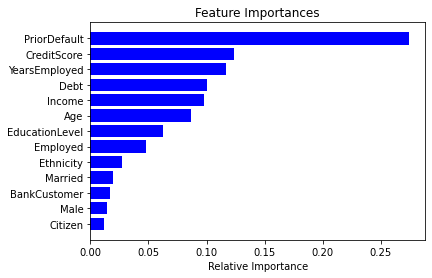

In [244]:
importances = rf_clf.feature_importances_

features = train_data.columns
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [247]:
n_estimators = [100,200,300]
criterion = ["gini", "entropy"]
max_depth = [5,10,15]

param_grid = {'n_estimators': n_estimators, 'criterion': criterion, 'max_depth': max_depth}

In [248]:
# Instantiate GridSearchCV with the required parameters
rf_grid_model = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=10)

# Use scaler to rescale X and assign it to rescaledX
# rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
rf_grid_model_result = rf_grid_model.fit(train_features, train_label)

# Summarize results
best_score, best_params = (rf_grid_model_result.best_score_, rf_grid_model_result.best_params_)
print("Best score is: ", best_score,  " using the parameters: ", best_params)

Best score is:  0.8542372881355933  using the parameters:  {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}


In [249]:
prediction_test = rf_grid_model.predict(test_data)

In [250]:
prediction_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [251]:
test_data.iloc[0]

Male               1.00
Age               31.83
Debt               0.04
Married            1.00
BankCustomer       1.00
EducationLevel     8.00
Ethnicity          3.00
YearsEmployed      0.04
PriorDefault       0.00
Employed           0.00
CreditScore        0.00
Citizen            0.00
Income             0.00
Name: 0, dtype: float64

In [252]:
test_data.iloc[-1]

Male                1.00
Age                25.67
Debt               12.50
Married             0.00
BankCustomer        0.00
EducationLevel      2.00
Ethnicity           3.00
YearsEmployed       1.21
PriorDefault        1.00
Employed            1.00
CreditScore        67.00
Citizen             0.00
Income            258.00
Name: 99, dtype: float64